# Fuzzy Logic Dishwasher

## TABLE OF CONTENT
### $~~~~~$ - Inputs
### $~~~~~$ - Outputs
### $~~~~~$ - Fuzzy Mapping Table
### $~~~~~$ - Test

In [1]:
from skfuzzy import control as ctrl
import skfuzzy as fuzz
import numpy as np

---
## **Inputs**

**3 required inputs:**
1) **Dirtiness Level**
2) **Dish Quantity**
3) **Water Hardness**

#### **1. Dirtiness Level**
- **Description**: How dirty the dishes are.
- **Range**: 0 (clean) to 5 (extremely dirty).
- **Linguistic Terms**:
  - **Low**: Lightly soiled dishes (e.g., dust or minor food stains).
  - **Medium**: Moderately dirty dishes (e.g., dried sauces or mild grease).
  - **High**: Heavily soiled dishes (e.g., burnt food or heavy grease).

/opt/anaconda3/envs/fuzzy/lib/python3.12/site-packages/skfuzzy/control/fuzzyvariable.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


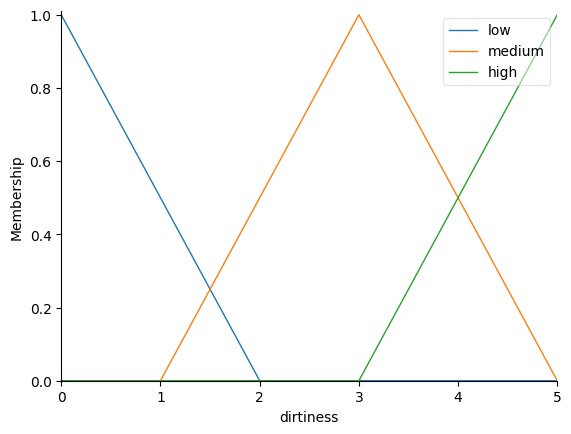

In [2]:
dirtiness = ctrl.Antecedent(np.arange(0, 6, 1), 'dirtiness')
dirtiness['low'] = fuzz.trimf(dirtiness.universe, [0, 0, 2])
dirtiness['medium'] = fuzz.trimf(dirtiness.universe, [1, 3, 5])
dirtiness['high'] = fuzz.trimf(dirtiness.universe, [3, 5, 5])
dirtiness.view()

#### **2. Dish Quantity**
- **Description**: Number of dishes loaded into the dishwasher.
- **Range**: 0 (no dishes) to 10 (maximum capacity).
- **Linguistic Terms**:
  - **Few**: Less than one-third of the dishwasher is loaded.
  - **Moderate**: Between one-third and two-thirds loaded.
  - **Many**: More than two-thirds loaded.

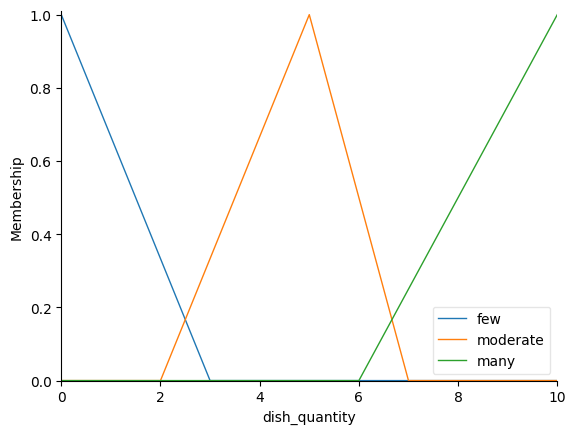

In [3]:
dish_quantity = ctrl.Antecedent(np.arange(0, 11, 1), 'dish_quantity')
dish_quantity['few'] = fuzz.trimf(dish_quantity.universe, [0, 0, 3])
dish_quantity['moderate'] = fuzz.trimf(dish_quantity.universe, [2, 5, 7])
dish_quantity['many'] = fuzz.trimf(dish_quantity.universe, [6, 10, 10])
dish_quantity.view()

#### **3. Water Hardness**
- **Description**: The hardness of the water being used.
- **Range**: 0 (soft water) to 10 (very hard water).
- **Linguistic Terms**:
  - **Soft**: Little or no hardness.
  - **Moderate**: Medium mineral content.
  - **Hard**: High mineral content, requiring more detergent.

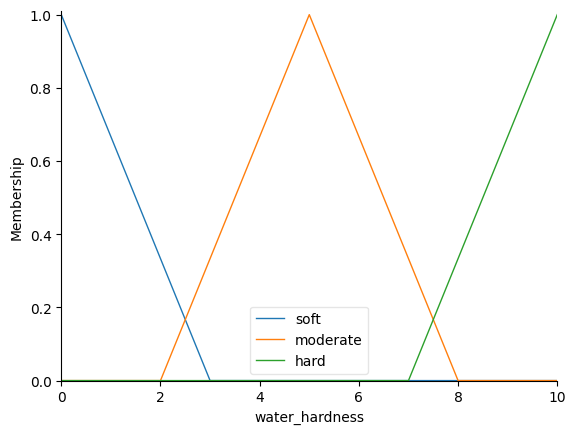

In [4]:
water_hardness = ctrl.Antecedent(np.arange(0, 11, 1), 'water_hardness')
water_hardness['soft'] = fuzz.trimf(water_hardness.universe, [0, 0, 3])
water_hardness['moderate'] = fuzz.trimf(water_hardness.universe, [2, 5, 8])
water_hardness['hard'] = fuzz.trimf(water_hardness.universe, [7, 10, 10])
water_hardness.view()

---
## **Outputs**

**3 outputs:**
1) **Wash Time**
2) **Detergent Amount**
3) **Water Temperature**

#### **1. Wash Time**
- **Description**: The duration of the washing cycle.
- **Range**: 0 to 60 minutes.
- **Linguistic Terms**:
  - **Short**: Quick rinse or lightly soiled dishes (0–20 minutes).
  - **Medium**: Moderate wash time for normal loads (15–40 minutes).
  - **Long**: Extended wash for very dirty dishes or heavy loads (30–60 minutes).

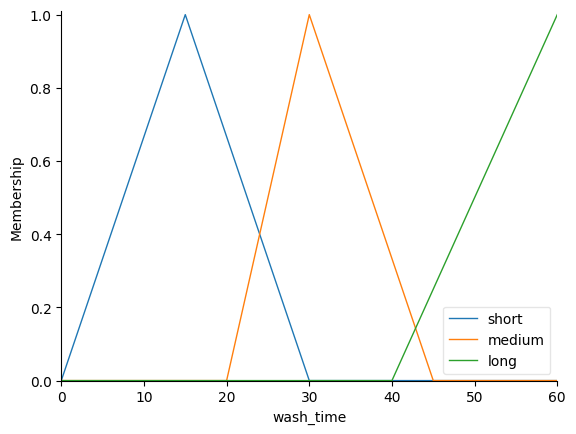

In [5]:
wash_time = ctrl.Consequent(np.arange(0, 61, 1), 'wash_time')
wash_time['short'] = fuzz.trimf(wash_time.universe, [0, 15, 30])
wash_time['medium'] = fuzz.trimf(wash_time.universe, [20, 30, 45])
wash_time['long'] = fuzz.trimf(wash_time.universe, [40, 60, 60])
wash_time.view()

#### **2. Detergent Amount**
- **Description**: The quantity of detergent to use.
- **Range**: 0 (none) to 10 (maximum dosage).
- **Linguistic Terms**:
  - **Low**: Minimal detergent (0–3 units).
  - **Medium**: Moderate detergent for average loads (3–7 units).
  - **High**: High detergent for heavy loads or very dirty dishes (7–10 units).

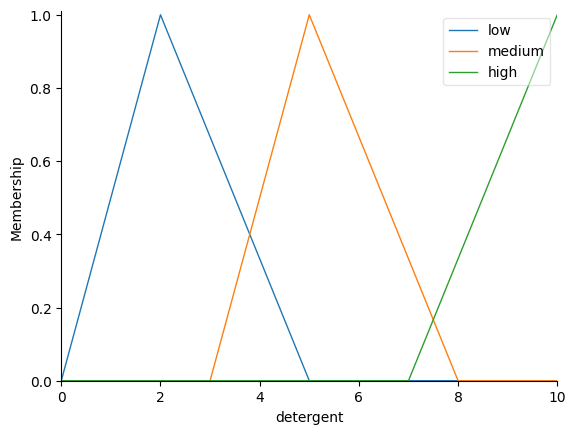

In [6]:
detergent = ctrl.Consequent(np.arange(0, 11, 1), 'detergent')
detergent['low'] = fuzz.trimf(detergent.universe, [0, 2, 5])
detergent['medium'] = fuzz.trimf(detergent.universe, [3, 5, 8])
detergent['high'] = fuzz.trimf(detergent.universe, [7, 10, 10])
detergent.view()

#### **3. Water Temperature**
- **Description**: The temperature of the water during the washing cycle.
- **Range**: 30°C to 90°C.
- **Linguistic Terms**:
  - **Low**: Warm water for delicate loads or lightly soiled dishes (30–50°C).
  - **Medium**: Hot water for normal cleaning (50–70°C).
  - **High**: Very hot water for heavy cleaning (70–90°C).

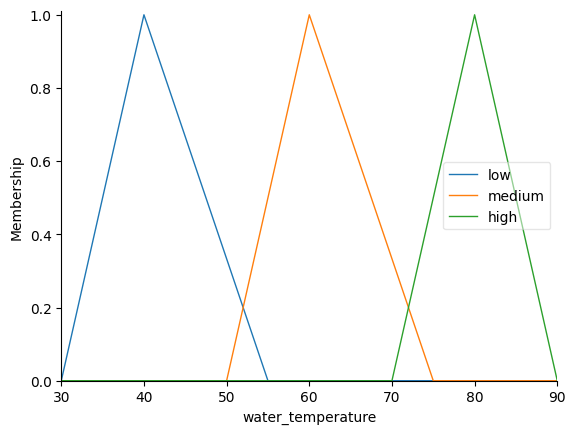

In [7]:
water_temperature = ctrl.Consequent(np.arange(30, 91, 1), 'water_temperature')
water_temperature['low'] = fuzz.trimf(water_temperature.universe, [30, 40, 55])
water_temperature['medium'] = fuzz.trimf(water_temperature.universe, [50, 60, 75])
water_temperature['high'] = fuzz.trimf(water_temperature.universe, [70, 80, 90])
water_temperature.view()

---
## **Fuzzy Mapping Table**

**Inputs:** **Dirtiness Level**, **Dish Quantity**, **Water Hardness**

**Outputs:** **Wash Time**, **Detergent Amount**, **Water Temperature**

| **Dirtiness Level** | **Dish Quantity** | **Water Hardness** | **Wash Time** | **Detergent Amount** | **Water Temperature** |
|---------------------|-------------------|--------------------|---------------|----------------------|-----------------------|
| Low                 | Few              | Soft               | Short         | Low                  | Low                   |
| Low                 | Few              | Moderate           | Short         | Low                  | Medium                |
| Low                 | Few              | Hard               | Medium        | Medium               | Medium                |
| Low                 | Moderate         | Soft               | Short         | Low                  | Medium                |
| Low                 | Moderate         | Moderate           | Medium        | Medium               | Medium                |
| Low                 | Moderate         | Hard               | Medium        | Medium               | Medium                |
| Low                 | Many             | Soft               | Medium        | Medium               | Medium                |
| Low                 | Many             | Moderate           | Medium        | Medium               | Medium                |
| Low                 | Many             | Hard               | Medium        | Medium               | Medium                |
| Medium              | Few              | Soft               | Medium        | Low                  | Medium                |
| Medium              | Few              | Moderate           | Medium        | Medium               | Medium                |
| Medium              | Few              | Hard               | Medium        | Medium               | Medium                |
| Medium              | Moderate         | Soft               | Medium        | Medium               | Medium                |
| Medium              | Moderate         | Moderate           | Medium        | Medium               | Medium                |
| Medium              | Moderate         | Hard               | Medium        | Medium               | Medium                |
| Medium              | Many             | Soft               | Long          | Medium               | High                  |
| Medium              | Many             | Moderate           | Long          | Medium               | High                  |
| Medium              | Many             | Hard               | Long          | Medium               | High                  |
| High                | Few              | Soft               | Medium        | Medium               | Medium                |
| High                | Few              | Moderate           | Medium        | Medium               | High                  |
| High                | Few              | Hard               | Medium        | Medium               | High                  |
| High                | Moderate         | Soft               | Medium        | High                 | Medium                |
| High                | Moderate         | Moderate           | Long          | High                 | High                  |
| High                | Moderate         | Hard               | Long          | High                 | High                  |
| High                | Many             | Soft               | Long          | High                 | High                  |
| High                | Many             | Moderate           | Long          | High                 | High                  |
| High                | Many             | Hard               | Long          | High                 | High                  |

In [8]:
rules = {
    'rule1': ctrl.Rule(dirtiness['low'] & dish_quantity['few'] & water_hardness['soft'],
                       [wash_time['short'], detergent['low'], water_temperature['low']]),
    'rule2': ctrl.Rule(dirtiness['low'] & dish_quantity['few'] & water_hardness['moderate'],
                       [wash_time['short'], detergent['low'], water_temperature['medium']]),
    'rule3': ctrl.Rule(dirtiness['low'] & dish_quantity['few'] & water_hardness['hard'],
                       [wash_time['medium'], detergent['medium'], water_temperature['medium']]),
    'rule4': ctrl.Rule(dirtiness['low'] & dish_quantity['moderate'] & water_hardness['soft'],
                       [wash_time['short'], detergent['low'], water_temperature['medium']]),
    'rule5': ctrl.Rule(dirtiness['low'] & dish_quantity['moderate'] & water_hardness['moderate'],
                       [wash_time['medium'], detergent['medium'], water_temperature['medium']]),
    'rule6': ctrl.Rule(dirtiness['low'] & dish_quantity['moderate'] & water_hardness['hard'],
                       [wash_time['medium'], detergent['medium'], water_temperature['medium']]),
    'rule7': ctrl.Rule(dirtiness['low'] & dish_quantity['many'] & water_hardness['soft'],
                       [wash_time['medium'], detergent['medium'], water_temperature['medium']]),
    'rule8': ctrl.Rule(dirtiness['low'] & dish_quantity['many'] & water_hardness['moderate'],
                       [wash_time['medium'], detergent['medium'], water_temperature['medium']]),
    'rule9': ctrl.Rule(dirtiness['low'] & dish_quantity['many'] & water_hardness['hard'],
                       [wash_time['medium'], detergent['medium'], water_temperature['medium']]),
    'rule10': ctrl.Rule(dirtiness['medium'] & dish_quantity['few'] & water_hardness['soft'],
                        [wash_time['medium'], detergent['low'], water_temperature['medium']]),
    'rule11': ctrl.Rule(dirtiness['medium'] & dish_quantity['few'] & water_hardness['moderate'],
                        [wash_time['medium'], detergent['medium'], water_temperature['medium']]),
    'rule12': ctrl.Rule(dirtiness['medium'] & dish_quantity['few'] & water_hardness['hard'],
                        [wash_time['medium'], detergent['medium'], water_temperature['medium']]),
    'rule13': ctrl.Rule(dirtiness['medium'] & dish_quantity['moderate'] & water_hardness['soft'],
                        [wash_time['medium'], detergent['medium'], water_temperature['medium']]),
    'rule14': ctrl.Rule(dirtiness['medium'] & dish_quantity['moderate'] & water_hardness['moderate'],
                        [wash_time['medium'], detergent['medium'], water_temperature['medium']]),
    'rule15': ctrl.Rule(dirtiness['medium'] & dish_quantity['moderate'] & water_hardness['hard'],
                        [wash_time['long'], detergent['high'], water_temperature['high']]),
    'rule16': ctrl.Rule(dirtiness['medium'] & dish_quantity['many'] & water_hardness['soft'],
                        [wash_time['long'], detergent['medium'], water_temperature['high']]),
    'rule17': ctrl.Rule(dirtiness['medium'] & dish_quantity['many'] & water_hardness['moderate'],
                        [wash_time['long'], detergent['medium'], water_temperature['high']]),
    'rule18': ctrl.Rule(dirtiness['medium'] & dish_quantity['many'] & water_hardness['hard'],
                        [wash_time['long'], detergent['medium'], water_temperature['high']]),
    'rule19': ctrl.Rule(dirtiness['high'] & dish_quantity['few'] & water_hardness['soft'],
                        [wash_time['medium'], detergent['medium'], water_temperature['medium']]),
    'rule20': ctrl.Rule(dirtiness['high'] & dish_quantity['few'] & water_hardness['moderate'],
                        [wash_time['medium'], detergent['medium'], water_temperature['high']]),
    'rule21': ctrl.Rule(dirtiness['high'] & dish_quantity['few'] & water_hardness['hard'],
                        [wash_time['medium'], detergent['medium'], water_temperature['high']]),
    'rule22': ctrl.Rule(dirtiness['high'] & dish_quantity['moderate'] & water_hardness['soft'],
                        [wash_time['medium'], detergent['high'], water_temperature['medium']]),
    'rule23': ctrl.Rule(dirtiness['high'] & dish_quantity['moderate'] & water_hardness['moderate'],
                        [wash_time['long'], detergent['high'], water_temperature['high']]),
    'rule24': ctrl.Rule(dirtiness['high'] & dish_quantity['moderate'] & water_hardness['hard'],
                        [wash_time['long'], detergent['high'], water_temperature['high']]),
    'rule25': ctrl.Rule(dirtiness['high'] & dish_quantity['many'] & water_hardness['soft'],
                        [wash_time['long'], detergent['high'], water_temperature['high']]),
    'rule26': ctrl.Rule(dirtiness['high'] & dish_quantity['many'] & water_hardness['moderate'],
                        [wash_time['long'], detergent['high'], water_temperature['high']]),
    'rule27': ctrl.Rule(dirtiness['high'] & dish_quantity['many'] & water_hardness['hard'],
                        [wash_time['long'], detergent['high'], water_temperature['high']])
}

In [9]:
# Control System Setup
dishwasher_ctrl = ctrl.ControlSystem(rules.values())
dishwasher_simulation = ctrl.ControlSystemSimulation(dishwasher_ctrl)

## **Test**

In [10]:
# Set input values
dishwasher_simulation.input['dirtiness'] = 4  # High dirtiness
dishwasher_simulation.input['dish_quantity'] = 7  # Many dishes
dishwasher_simulation.input['water_hardness'] = 8  # Hard water

In [11]:
# Perform computation
dishwasher_simulation.compute()

In [12]:
# Get outputs
print(f"Recommended Wash Time: {round(dishwasher_simulation.output['wash_time'], 1)} minutes")
print(f"Recommended Detergent Amount: {round(dishwasher_simulation.output['detergent'], 1)} units")
print(f"Recommended Water Temperature: {round(dishwasher_simulation.output['water_temperature'], 1)} °C")

Recommended Wash Time: 51.2 minutes
Recommended Detergent Amount: 6.6 units
Recommended Water Temperature: 80.0 °C
